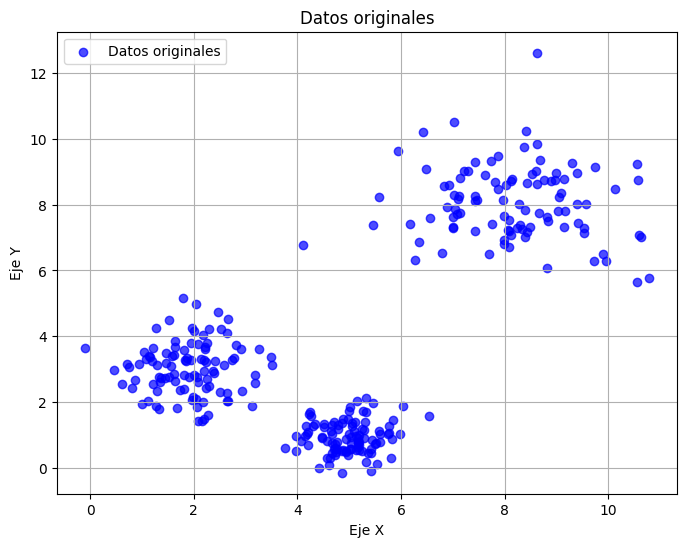

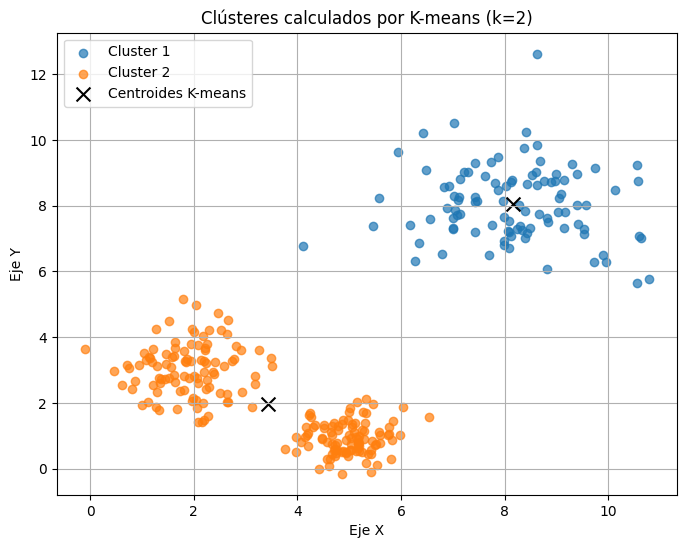

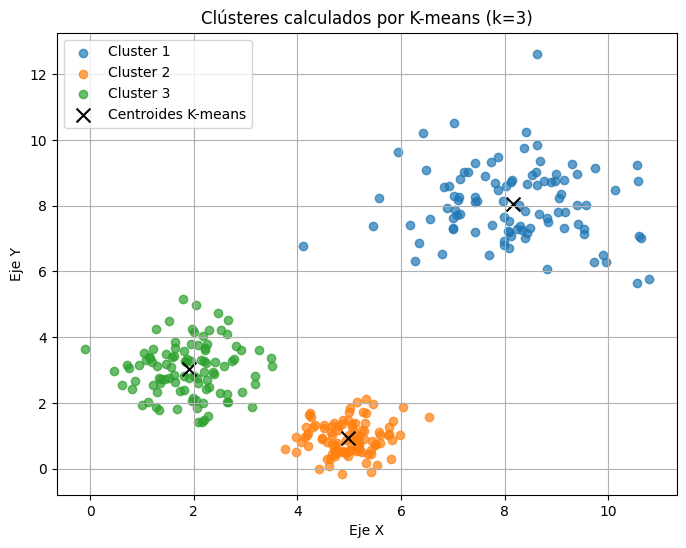

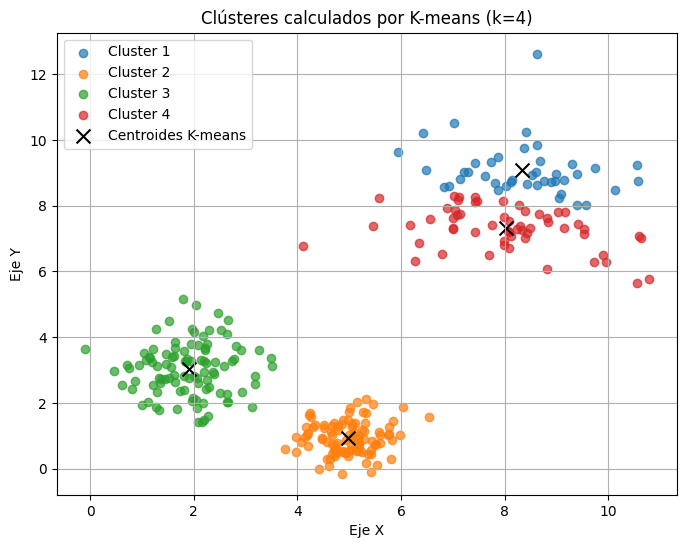

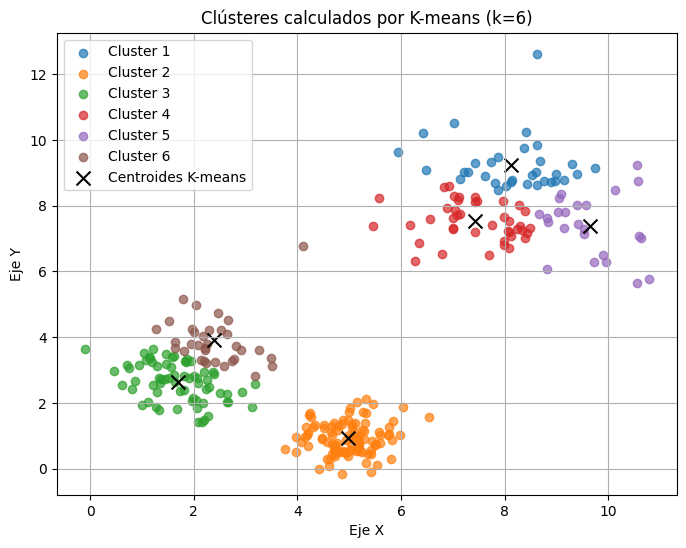

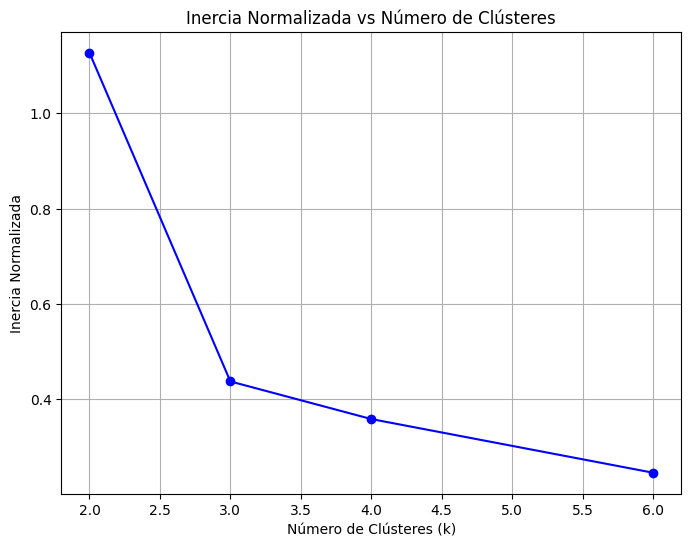

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Crear carpeta para guardar imágenes
output_dir = "cluster_images"
os.makedirs(output_dir, exist_ok=True)

# Definición de parámetros para los tres clústeres
# Posiciones de los centroides (pueden ser modificados)
centroids = [
    [2, 3],  # Centroide del primer clúster
    [8, 8],  # Centroide del segundo clúster
    [5, 1]   # Centroide del tercer clúster
]

# Ruido de cada cluster
std_devs = [0.8, 1.2, 0.5]

# Putos de cada cluster
n_points_per_cluster = 100

# Generar los datos (puntos) con random
np.random.seed(42)
cluster_1 = np.random.normal(loc=centroids[0], scale=std_devs[0], size=(n_points_per_cluster, 2))
cluster_2 = np.random.normal(loc=centroids[1], scale=std_devs[1], size=(n_points_per_cluster, 2))
cluster_3 = np.random.normal(loc=centroids[2], scale=std_devs[2], size=(n_points_per_cluster, 2))

# Crear un DataFrame con los datos para aplicar K-means posteriormente
cluster_1_df = pd.DataFrame(cluster_1, columns=['x', 'y'])
cluster_1_df['cluster'] = 1

cluster_2_df = pd.DataFrame(cluster_2, columns=['x', 'y'])
cluster_2_df['cluster'] = 2

cluster_3_df = pd.DataFrame(cluster_3, columns=['x', 'y'])
cluster_3_df['cluster'] = 3

# Concatenar todos los datos en un único DataFrame
data = pd.concat([cluster_1_df, cluster_2_df, cluster_3_df], ignore_index=True)

# Visualización de los datos originales
plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'], color="blue", label="Datos originales", alpha=0.7)
plt.title("Datos originales")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(output_dir, "datos_originales.png"))
plt.show()

# Aplicar K-means con diferentes cantidades de clústeres
inercias = []
k_values = [2, 3, 4, 6]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data[['x', 'y']])
    data[f'kmeans_cluster_k{k}'] = kmeans.labels_
    inercias.append(kmeans.inertia_/1000)  # Escalar inercia a 0-1

    # Visualización de los resultados
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green', 'orange']
    for cluster_label in range(k):
        cluster_data = data[data[f'kmeans_cluster_k{k}'] == cluster_label]
        plt.scatter(cluster_data['x'], cluster_data['y'], label=f"Cluster {cluster_label+1}", alpha=0.7)

    # Dibujar centroides calculados por K-means
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black", marker="x", s=100, label="Centroides K-means")
    plt.title(f"Clústeres calculados por K-means (k={k})")
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f"kmeans_clusters_k{k}.png"))
    plt.show()

# Graficar la inercia
plt.figure(figsize=(8, 6))
plt.plot(k_values, inercias, marker='o', linestyle='-', color='b')
plt.title("Inercia Normalizada vs Número de Clústeres")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia Normalizada")
plt.grid(True)
plt.savefig(os.path.join(output_dir, "inercia_normalizada_vs_k.png"))
plt.show()


In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import Image

# Crear carpeta para guardar imágenes
output_dir = "cluster_images"
os.makedirs(output_dir, exist_ok=True)

# Función para generar un conjunto de datos con diferentes dispersión y posiciones de centroides
def generate_example(centroids, std_devs, n_points_per_cluster, example_num):
    np.random.seed(42 + example_num)  # Cambiar semilla para obtener resultados distintos

    # Generar los datos (puntos) con random
    clusters = []
    for i, centroid in enumerate(centroids):
        cluster = np.random.normal(loc=centroid, scale=std_devs[i], size=(n_points_per_cluster, 2))
        cluster_df = pd.DataFrame(cluster, columns=['x', 'y'])
        cluster_df['cluster'] = i + 1
        clusters.append(cluster_df)
    
    # Concatenar todos los datos en un único DataFrame
    data = pd.concat(clusters, ignore_index=True)

    # Visualización de los datos originales
    plt.figure(figsize=(8, 6))
    plt.scatter(data['x'], data['y'], color="blue", label="Datos originales", alpha=0.7)
    plt.title(f"Datos originales - Ejemplo {example_num}")
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f"datos_originales_{example_num}.png"))
    plt.close()

    return data

# Parámetros para cada ejemplo (cambiamos dispersión y posiciones de los centroides)
examples_params = [
    # Ejemplo 1: Centroides cercanos, dispersión moderada
    {
        'centroids': [[2, 3], [8, 8], [5, 1]],
        'std_devs': [1.0, 1.0, 1.0],
    },
    # Ejemplo 2: Centroides distantes, dispersión grande
    {
        'centroids': [[2, 3], [15, 15], [8, 1]],
        'std_devs': [2.0, 2.5, 2.0],
    },
    # Ejemplo 3: Centroides cercanos, dispersión grande
    {
        'centroids': [[5, 5], [6, 6], [7, 7]],
        'std_devs': [2.0, 2.0, 2.0],
    },
    # Ejemplo 4: Centroides alejados, dispersión pequeña
    {
        'centroids': [[2, 2], [10, 10], [4, 8]],
        'std_devs': [0.5, 0.5, 0.5],
    }
]

n_points_per_cluster = 100
k_values = [2, 3, 4, 6]

# Generación de ejemplos y sus gráficos
for example_num, params in enumerate(examples_params, start=1):
    data = generate_example(params['centroids'], params['std_devs'], n_points_per_cluster, example_num)

    # Aplicar K-means con diferentes cantidades de clústeres
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data[['x', 'y']])
        data[f'kmeans_cluster_k{k}'] = kmeans.labels_

        # Visualización de los resultados
        plt.figure(figsize=(8, 6))
        colors = ['red', 'blue', 'green', 'orange']
        for cluster_label in range(k):
            cluster_data = data[data[f'kmeans_cluster_k{k}'] == cluster_label]
            plt.scatter(cluster_data['x'], cluster_data['y'], label=f"Cluster {cluster_label+1}", alpha=0.7)

        # Dibujar centroides calculados por K-means
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black", marker="x", s=100, label="Centroides K-means")
        plt.title(f"Clústeres calculados por K-means (k={k}) - Ejemplo {example_num}")
        plt.xlabel("Eje X")
        plt.ylabel("Eje Y")
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(output_dir, f"kmeans_clusters_k{k}_example_{example_num}.png"))
        plt.close()

# Crear un archivo PDF
def create_pdf(output_path):
    c = canvas.Canvas(output_path, pagesize=letter)
    width, height = letter
    
    # Título
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, height - 40, "Resultados del Clustering K-means (Ejemplos con Diferente Dispersión)")
    
    y_position = height - 80

    # Incluir los ejemplos generados
    for example_num, params in enumerate(examples_params, start=1):
        # Datos originales
        c.drawString(100, y_position, f"Datos originales - Ejemplo {example_num}")
        c.drawImage(os.path.join(output_dir, f"datos_originales_{example_num}.png"), 100, y_position - 200, width=400, height=200)
        y_position -= 250

        # Clústeres calculados con diferentes valores de k
        for k in k_values:
            c.drawString(100, y_position, f"Clústeres calculados por K-means (k={k}) - Ejemplo {example_num}")
            c.drawImage(os.path.join(output_dir, f"kmeans_clusters_k{k}_example_{example_num}.png"), 100, y_position - 200, width=400, height=200)
            y_position -= 250

        # Reajustamos la posición para el siguiente ejemplo
        if y_position < 100:
            c.showPage()  # Crear una nueva página en el PDF
            y_position = height - 40

    c.save()

# Crear el PDF
create_pdf("notebook_results_multiple_examples.pdf")
